#### 1. Prepocessing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# training set
df_tv = pd.read_csv('./data/quasar_train.csv')
cols_tv = df_tv.columns.values.astype(float).astype(int) 

# test set
df_test = pd.read_csv('./data/quasar_test.csv')
cols_test = df_test.columns.values.astype(float).astype(int) #string to float, then to integer

In [3]:
df_tv.shape  # 200 examples in test set (200, 450)
cols_tv.shape # each example has 450 variables

(450,)

In [4]:
assert (cols_tv == cols_test).all() #test if training or test set have the same variables 
df_tv.columns = cols_tv #replace columns of trainning sets by interger 
df_test.columns = cols_test #replace columns of test sets by interger 
wave_lens = cols_tv

Take a quick look

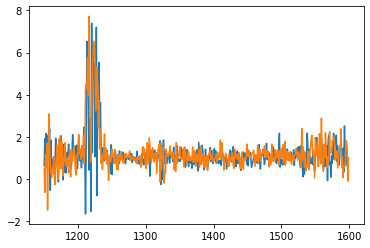

In [5]:
plt.plot(wave_lens, df_tv.loc[0]) #first training example
plt.plot(wave_lens, df_test.loc[29]) #30

#### 2.1 implement (unweighted) linear regression  on the first training example


Normal Equation  
$\theta = (X^T X)^{-1} X^T \vec{y}$ for (unweighted) linear regression

$\theta = (X^T W X)^{-1} X^T W \vec{y}$ for  Locally Weighted linear Regression.

In [6]:
def optim(X, y, W=None):
    if W is None:
        return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    else:
        return np.linalg.inv(X.T.dot(W).dot(X)).dot(X.T).dot(W).dot(y)

In [7]:
x0 = np.ones(df_tv.shape[1]) #intercept
x1 = wave_lens # x1 of 450 examples
y = df_tv.head(1).values.ravel() #response variable
X = np.vstack([x0, x1]).T #input variable

In [8]:
print(X.shape, y.shape)

(450, 2) (450,)


In [9]:
theta = optim(X, y)

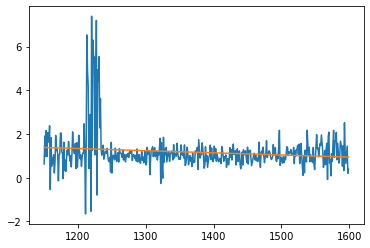

In [10]:
plt.plot(wave_lens, df_tv.iloc[0].values) 
plt.plot(wave_lens, X.dot(theta)) #plot (x, predicated y)

#### 2.2 implement Locally weighted linear regression on the first training example

In [11]:
x0 = np.ones(df_tv.shape[1])
x1 = wave_lens
y = df_tv.head(1).values.ravel()
X = np.stack([x0, x1]).T

1. Define Weight matrix for each query point
2. For each iteration,  
>Firstly, define the kth query point is the $x^{k}$  
    Secondly, fit a linear regression model based a weight matrix at $x^{k}$ .  
    Lastly, make a prediction at $x^{k}$  based this linear regression model
     Therefore, we will create 450 weight matrices, and fit 450 linear regression models 

If $\tau = 5$

In [12]:
def construct_weight_matrix(X, x_eval, tau=5):
    return np.diag(np.exp(- (X[:,1] - x_eval[1]) **2 / (2 * tau ** 2)))

In [13]:
res = []
preds = []
for k, x_eval in enumerate(X): #index, each row of X
    W = construct_weight_matrix(X, x_eval) 
    theta = optim(X, y, W)  # intercept term has also optimized in this step
    preds.append(theta.dot(x_eval))

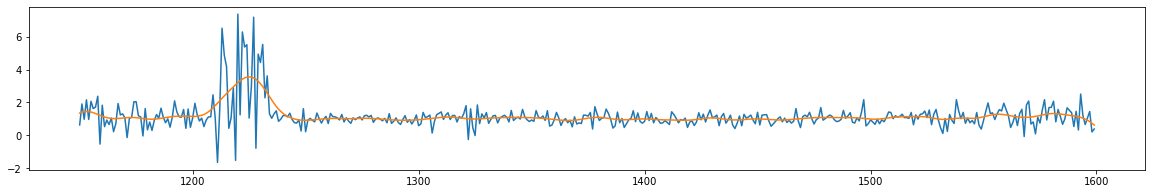

In [14]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(wave_lens, df_tv.loc[0].values)
plt.plot(wave_lens, preds)

If we varying $\tau$,

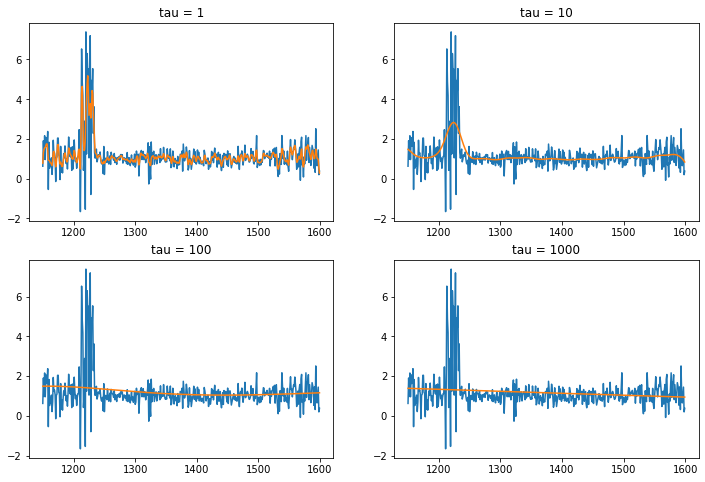

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for k, tau in enumerate([1, 10, 100, 1000]):
    ax = axes[k]
    preds = []
    for x_eval in X:
        W = construct_weight_matrix(X, x_eval, tau=tau)
        theta = optim(X, y, W)
        preds.append(theta.dot(x_eval))

    ax.plot(wave_lens, df_tv.loc[0].values) #the real y
    ax.plot(wave_lens, preds) # the predicated y
    ax.set_title('tau = {0}'.format(tau))